# Logistic regression on MNIST

In [1]:
%%capture
%load_ext jupyter_probcomp.magics
%matplotlib inline

Load the read infer predict layer (ripl) and set venture's random seed to 1 to
ensure reproducibility.

In [2]:
%ripl --seed 42 --plugins plugins.py

Set seed of a new VentureScript RIPL to 42.00.
Loading plugin: plugins.py


## Model

In [3]:
%%venturescript
// MODEL
// First, load data
define training_xs     = load_normalized(str_concat(get_path(), "/mnist/training_data12_100examples.csv"));
define training_labels = load_csv(str_concat(get_path(), "/mnist/training_labels12_100examples.csv"));
define test_xs         = load_normalized(str_concat(get_path(), "/mnist/test_data12_100examples.csv"));
define test_labels     = load_csv(str_concat(get_path(), "/mnist/test_labels12_100examples.csv"));
// Classification model
define number_input_dimensions = size(training_xs[0]);
assume sigmoid = (x) -> {
    1./(1. + exp(-x))
};

assume intercept = normal(0,10) #weight:0;
assume slope = mapv(
    (dimension) -> {normal(0,10) #weight:dimension},
    arange(1, $number_input_dimensions + 1)
);
assume line = (x) -> {vector_dot(slope, x) + intercept};
assume classifification_probability = (x) -> {
    sigmoid(line(x)) 
};
assume classifier = (x) -> {
    bernoulli(classifification_probability(x)) #class:x
};


## Observations

In [4]:
%%venturescript
// OBSERVATIONS
define N = size(training_xs);
for_each(arange(N), (i) -> {
    observe classifier(${training_xs[i]}) = training_labels[i];
});

## Inference

In [5]:
%%venturescript
// INFERENCE
define single_site_mh = () -> {
    mh(default, one, 1)    
};

define resimulation_mh = () -> {
    mh(default, all, 1)    
};


define slice_sampling_all = () -> {
    slice(quote(weight), all, 0.25, 1, 1);
    gibbs(quote(class), one, 1);
};
define slice_sampling_one = () -> {
    slice(quote(weight), one, 0.25, 1, 1);
    gibbs(quote(class), one, 1);
};



##  Show observations

In [6]:
training_xs = %venturescript training_xs
test_xs = %venturescript test_xs

In [7]:
from plugins import plot_mnist_data

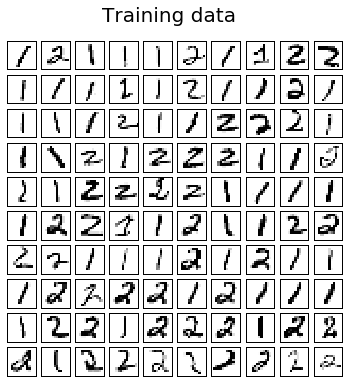

In [8]:
fig = plot_mnist_data(training_xs, 'Training data')
#fig.savefig('mnist12.pdf', bbox_inches='tight')

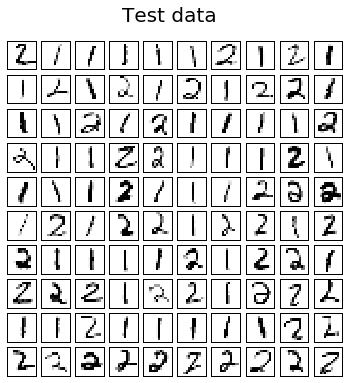

In [9]:
fig = plot_mnist_data(test_xs, 'Test data')
#fig.savefig('mnist12.pdf', bbox_inches='tight')